In [1]:
import sys
sys.path.append("..")
sys.path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
paths_to_monthly_composites = ['data/delta_junction_wb_tracking.parquet',
                               'data/fairbanks_wb_tracking.parquet',
                                'data/yukon_flats_wb_tracking.parquet',
                               'data/YKD_wb_tracking.parquet'
                               ]
AOIs = ['DJ', 'FB', 'YF', 'YKD']

In [3]:
mm = 1/25.4

In [4]:
gdfs = []

for i in range(0, len(paths_to_monthly_composites)):
    if AOIs[i] != '':
        individual_lakes_dates = pd.read_parquet(paths_to_monthly_composites[i])
        individual_lakes_dates['date'] = pd.to_datetime(individual_lakes_dates['date'])
        individual_lakes_dates['raw_area_interpolated'] = individual_lakes_dates['raw_area_interpolated'].fillna(0)
        
        individual_lakes_dates_groupby = individual_lakes_dates.groupby(by ='date').sum()
        individual_lakes_dates_groupby = individual_lakes_dates_groupby.reset_index()

        first_area = individual_lakes_dates_groupby.loc[individual_lakes_dates_groupby['date']==individual_lakes_dates_groupby['date'].min()]['predicted_area_interpolated'].max()
        individual_lakes_dates_groupby['pct_max'] = ((1 - (1-individual_lakes_dates_groupby['predicted_area_interpolated']/first_area)) * 100)-100
        individual_lakes_dates_groupby['AOI'] = [AOIs[i]]* len(individual_lakes_dates_groupby)
        gdfs.append(individual_lakes_dates_groupby)
    
gdfs = pd.concat(gdfs)
gdfs=gdfs.reset_index()

In [5]:
gdfs['pct_rmse'] = ((((gdfs['raw_area_interpolated'] - gdfs['predicted_area_interpolated']) ** 2) ** .5)/gdfs['predicted_area_interpolated'])*100

In [6]:
gdfs.head(10)

,index,date,wb_id,predicted_area,predicted_area_std,composite_area,median_filter,num_obs,raw_area_interpolated,predicted_area_interpolated,pct_max,AOI,pct_rmse
0,0,2021-05-24,14705717,4.082651e+07,3.636145e+06,1.181950e+08,4.048035e+07,105380,4.839875e+07,4.804653e+07,0.000000,DJ,0.733084
1,1,2021-05-25,14705717,3.682989e+06,3.640092e+06,1.181950e+08,3.456058e+06,105380,4.840803e+07,4.818506e+07,0.288336,DJ,0.462738
2,2,2021-05-26,14705717,3.682656e+07,3.643458e+06,1.181950e+08,3.689674e+07,105380,4.820664e+07,4.824742e+07,0.418115,DJ,0.084513
3,3,2021-05-27,14705717,9.681135e+04,3.606136e+06,1.181950e+08,0.000000e+00,105380,4.790112e+07,4.822710e+07,0.375833,DJ,0.675938
4,4,2021-05-28,14705717,8.652556e+04,3.568814e+06,1.181950e+08,0.000000e+00,105380,4.759569e+07,4.820679e+07,0.333552,DJ,1.267654
5,5,2021-05-29,14705717,3.821130e+03,3.531493e+06,1.181950e+08,0.000000e+00,105380,4.728773e+07,4.818647e+07,0.291271,DJ,1.865138
6,6,2021-05-30,14705717,2.542823e+04,3.494171e+06,1.181950e+08,2.707444e+04,105380,4.697977e+07,4.816616e+07,0.248990,DJ,2.463126
7,7,2021-05-31,14705717,5.156547e+05,3.456850e+06,1.181950e+08,5.258113e+05,105380,4.667645e+07,4.814658e+07,0.208235,DJ,3.053439
8,8,2021-06-01,14705717,8.426017e+04,3.419553e+06,1.181950e+08,0.000000e+00,105380,4.635841e+07,4.812752e+07,0.168565,DJ,3.675887
9,9,2021-06-02,14705717,3.132966e+06,3.382255e+06,1.181950e+08,1.059215e+06,105380,4.604036e+07,4.810846e+07,0.128895,DJ,4.298828


In [7]:
gdfs_ponds = []

for i in range(0, len(paths_to_monthly_composites)):
    if AOIs[i] != '':
        
        individual_lakes_dates = pd.read_parquet(paths_to_monthly_composites[i])
        individual_lakes_dates = individual_lakes_dates[individual_lakes_dates['composite_area']/1000000<0.01]
        individual_lakes_dates['date'] = pd.to_datetime(individual_lakes_dates['date'])
        individual_lakes_dates['raw_area_interpolated'] = individual_lakes_dates['raw_area_interpolated'].fillna(0)
        individual_lakes_dates_groupby = individual_lakes_dates.groupby(by ='date').sum()
        individual_lakes_dates_groupby = individual_lakes_dates_groupby.reset_index()

        first_area = individual_lakes_dates_groupby.loc[individual_lakes_dates_groupby['date']==individual_lakes_dates_groupby['date'].min()]['predicted_area_interpolated'].max()
        individual_lakes_dates_groupby['pct_max'] = ((1 - (1-individual_lakes_dates_groupby['predicted_area_interpolated']/first_area))*100)-100
        individual_lakes_dates_groupby['AOI'] = [AOIs[i]]* len(individual_lakes_dates_groupby)
        gdfs_ponds.append(individual_lakes_dates_groupby)
    
gdfs_ponds = pd.concat(gdfs_ponds)
gdfs_ponds=gdfs_ponds.reset_index()

In [8]:
gdfs_lakes = []

for i in range(0, len(paths_to_monthly_composites)):
    if AOIs[i] != '':
        
        individual_lakes_dates = pd.read_parquet(paths_to_monthly_composites[i])
        individual_lakes_dates = individual_lakes_dates[individual_lakes_dates['composite_area']/1000000>0.01]
        individual_lakes_dates['date'] = pd.to_datetime(individual_lakes_dates['date'])
        individual_lakes_dates['raw_area_interpolated'] = individual_lakes_dates['raw_area_interpolated'].fillna(0)
        individual_lakes_dates_groupby = individual_lakes_dates.groupby(by ='date').sum()
        individual_lakes_dates_groupby = individual_lakes_dates_groupby.reset_index()

        first_area = individual_lakes_dates_groupby.loc[individual_lakes_dates_groupby['date']==individual_lakes_dates_groupby['date'].min()]['predicted_area_interpolated'].max()
        individual_lakes_dates_groupby['pct_max'] = ((1 - (1-individual_lakes_dates_groupby['predicted_area_interpolated']/first_area))*100)-100
        individual_lakes_dates_groupby['AOI'] = [AOIs[i]]* len(individual_lakes_dates_groupby)
        gdfs_lakes.append(individual_lakes_dates_groupby)
    
gdfs_lakes = pd.concat(gdfs_lakes)
gdfs_lakes=gdfs_lakes.reset_index()

In [9]:
gdfs_ponds['pct_rmse'] = ((((gdfs_ponds['raw_area_interpolated'] - gdfs_ponds['predicted_area_interpolated']) ** 2) ** .5)/gdfs_ponds['predicted_area_interpolated'])*100
gdfs_lakes['pct_rmse'] = ((((gdfs_lakes['raw_area_interpolated'] - gdfs_lakes['predicted_area_interpolated']) ** 2) ** .5)/gdfs_lakes['predicted_area_interpolated'])*100

In [10]:
palette = ['#fe9929',
           '#ef3ba3',
           '#74a9cf',
           '#66c2a4'
           ]

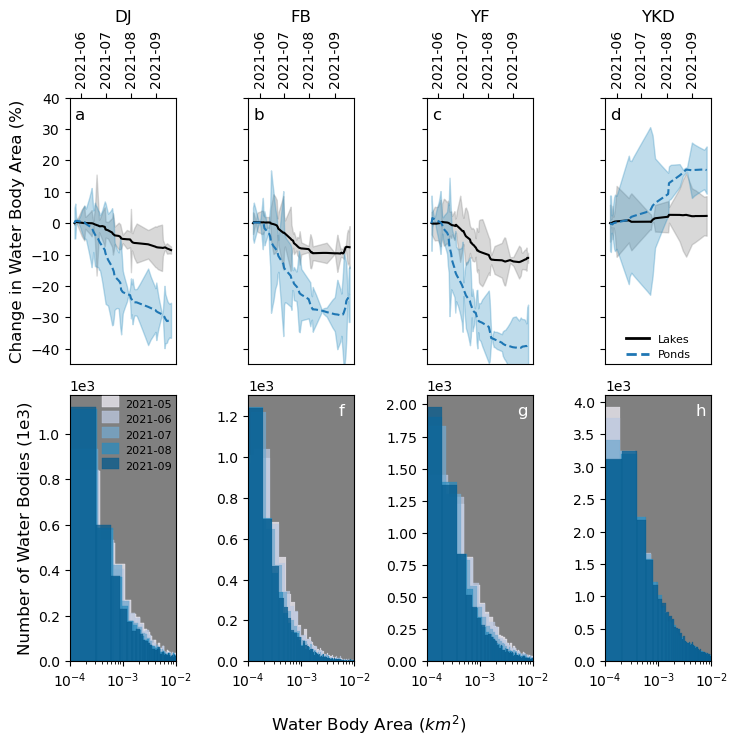

In [11]:
plt.rcParams.update(plt.rcParamsDefault)
fig, axes = plt.subplots(2,4,figsize=(190*mm,190*mm))

horizontal = 0
vertical = 0
i=0

for j in range(0,len(AOIs)*2):
         
    if j==4:
            
            horizontal = 0
            vertical +=1
            i=0
            
    if j<4:
        
        ax1=sns.lineplot(data = gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]], x = 'date', y='pct_max', color='black', ax=axes[vertical][horizontal])
        ax1.fill_between(gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]]['date'], 
                         gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]]['pct_max'] + gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]]['pct_rmse'], 
                         gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]]['pct_max'] - gdfs_lakes.loc[gdfs_lakes['AOI']==AOIs[i]]['pct_rmse'], 
                         color = 'grey', alpha = 0.3)
        ax2=sns.lineplot(data = gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]], x = 'date', y='pct_max', linestyle = 'dashed', legend=False, palette=palette, ax=axes[vertical][horizontal])
        ax2.fill_between(gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]]['date'], 
                         gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]]['pct_max'] + gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]]['pct_rmse'], 
                         gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]]['pct_max'] - gdfs_ponds.loc[gdfs_ponds['AOI']==AOIs[i]]['pct_rmse'], 
                         color = '#2b8cbe', alpha = 0.3)
        axes[vertical][horizontal].set_ylim(-45,40)
        
        if j==0:
            axes[vertical][horizontal].set_ylabel('Change in Water Body Area (%)', fontsize = 12)
            axes[vertical][horizontal].set_xlabel('')
        else:
            axes[vertical][horizontal].set_ylabel('')
            axes[vertical][horizontal].set_xlabel('')
            axes[vertical][horizontal].set(yticklabels=[])
        
        if j==3:
            custom_lines = [Line2D([0], [0], color='black', lw=2),
                            Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle = '--')]
            custom_labels = ['Lakes', 'Ponds']
            axes[vertical][horizontal].legend(custom_lines, custom_labels, fontsize = 8, loc='lower center', 
                                              borderaxespad=0, frameon = False)
        axes[vertical][horizontal].set_title(AOIs[j])
        axes[vertical][horizontal].xaxis.set_major_locator(mdates.MonthLocator())
        axes[vertical][horizontal].xaxis.set_minor_locator(mdates.MonthLocator())
        axes[vertical][horizontal].tick_params(axis='x', labelrotation = 90)
        axes[vertical][horizontal].xaxis.tick_top()
        
        
    if (j>=4 and j<8):
        
        
        individual_lakes_dates = pd.read_parquet(paths_to_monthly_composites[i])
        
        individual_lakes_dates['date'] = pd.to_datetime(individual_lakes_dates['date'])
        individual_lakes_dates['raw_area_interpolated'] = individual_lakes_dates['raw_area_interpolated'].fillna(0) 
        individual_lakes_dates['month'] = individual_lakes_dates['date'].dt.month

        
        individual_lakes_dates_filtered_monthly = individual_lakes_dates.groupby(by ='month')
        
        may = individual_lakes_dates_filtered_monthly.get_group(5)
        may = may.groupby('wb_id').mean()
        june = individual_lakes_dates_filtered_monthly.get_group(6)
        june = june.groupby('wb_id').mean()
        july = individual_lakes_dates_filtered_monthly.get_group(7)
        july = july.groupby('wb_id').mean()
        august = individual_lakes_dates_filtered_monthly.get_group(8)
        august = august.groupby('wb_id').mean()
        september = individual_lakes_dates_filtered_monthly.get_group(9)
        september = september.groupby('wb_id').mean()
        
        sns.histplot(x=may.loc[may['predicted_area_interpolated']<10000]['predicted_area_interpolated']/1000000, color="#f1eef6", label = '2021-05',kde=False, edgecolor='#f1eef6', ax = axes[vertical][horizontal])
        sns.histplot(x=june.loc[june['predicted_area_interpolated']<10000]['predicted_area_interpolated']/1000000, color="#bdc9e1", label = '2021-06',kde=False, edgecolor ='#bdc9e1', ax = axes[vertical][horizontal])
        sns.histplot(x=july.loc[july['predicted_area_interpolated']<10000]['predicted_area_interpolated']/1000000, color="#74a9cf", label = '2021-07',kde=False, edgecolor = '#74a9cf', ax = axes[vertical][horizontal])
        sns.histplot(x=august.loc[august['predicted_area_interpolated']<10000]['predicted_area_interpolated']/1000000, color="#2b8cbe", label = '2021-08',kde=False, edgecolor= '#2b8cbe', ax = axes[vertical][horizontal])
        sns.histplot(x=september.loc[september['predicted_area_interpolated']<10000]['predicted_area_interpolated']/1000000, color="#045a8d", label = '2021-09',kde=False, edgecolor= "#045a8d", ax = axes[vertical][horizontal])

        axes[vertical][horizontal].set(xscale='log')
        axes[vertical][horizontal].set_xlim(0.0001, 0.01)
        axes[vertical][horizontal].ticklabel_format(axis='y', style='sci', scilimits=(3,3))
        
        if j==4:
            axes[vertical][horizontal].set_ylabel('Number of Water Bodies (1e3)', fontsize = 12)
        else:
            axes[vertical][horizontal].set_ylabel('')
        
        axes[vertical][horizontal].set_xlabel('')  
        axes[vertical][horizontal].set_facecolor('grey')
        if j==4:
            leg=axes[vertical][horizontal].legend(bbox_to_anchor=(1, 1), loc='upper right', 
                                              borderaxespad=0, title='', title_fontsize = 10, 
                                              fontsize = 8, frameon=False
                                             )
            for patch in leg.get_patches():
                patch.set_height(8)
                patch.set_width(12)
                patch.set_x(6)
    horizontal+=1
    i+=1
axes[0][0].text(0.05, 0.92, 'a', transform=axes[0][0].transAxes, fontsize = 12)
axes[0][1].text(0.05, 0.92, 'b', transform=axes[0][1].transAxes, fontsize = 12)
axes[0][2].text(0.05, 0.92, 'c', transform=axes[0][2].transAxes, fontsize = 12)
axes[0][3].text(0.05, 0.92, 'd', transform=axes[0][3].transAxes, fontsize = 12)
#axes[1][0].text(1, 0.92, 'e', transform=axes[1][0].transAxes, fontsize = 12)
axes[1][1].text(0.85, 0.92, 'f', transform=axes[1][1].transAxes, fontsize = 12, color = 'white')
axes[1][2].text(0.85, 0.92, 'g', transform=axes[1][2].transAxes, fontsize = 12, color = 'white')
axes[1][3].text(0.85, 0.92, 'h', transform=axes[1][3].transAxes, fontsize = 12, color = 'white')

fig.supxlabel('Water Body Area ($km^2$)', fontsize=12)
plt.tight_layout()
plt.savefig('output/water_body_tracking_2021.jpg', dpi=300, bbox_inches='tight')
plt.show()
